# Import Some Libraries & Get Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../input/prosper-loan/prosperLoanData.csv")
df.head(10)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.shape

(113937, 81)

***OK, it seems we are facing big data and our journey will be long ^^***


***Let's start now ..***

# 1- Step One : Data Cleaning & Exploring 

***from sheet i found some features has unique  values .. this values not important for me***

***this features is  1- ListingKey, 2- ListingNumber , 3- GroupKey 4- LoanKey ,5- LoanNumber , 6- MemberKey***

In [5]:
df.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey","DateCreditPulled"],inplace= True )

***We will descover null values and we will handle it***

In [6]:
df.isnull().sum()

ListingCreationDate                0
CreditGrade                    84984
Term                               0
LoanStatus                         0
ClosedDate                     58848
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 74, dtype: int64

In [7]:
x = df.isnull().sum()
for i in range(len(x)) :
    print( str(i) + "  : " + str(x[i]) )

0  : 0
1  : 84984
2  : 0
3  : 0
4  : 58848
5  : 25
6  : 0
7  : 0
8  : 29084
9  : 29084
10  : 29084
11  : 29084
12  : 29084
13  : 29084
14  : 0
15  : 5515
16  : 3588
17  : 2255
18  : 7625
19  : 0
20  : 0
21  : 591
22  : 591
23  : 697
24  : 7604
25  : 7604
26  : 697
27  : 0
28  : 0
29  : 697
30  : 1159
31  : 697
32  : 7622
33  : 990
34  : 697
35  : 7604
36  : 7604
37  : 7604
38  : 7544
39  : 7544
40  : 7544
41  : 7544
42  : 8554
43  : 0
44  : 0
45  : 0
46  : 91852
47  : 91852
48  : 91852
49  : 91852
50  : 91852
51  : 91852
52  : 91852
53  : 95009
54  : 0
55  : 96985
56  : 0
57  : 0
58  : 0
59  : 0
60  : 0
61  : 0
62  : 0
63  : 0
64  : 0
65  : 0
66  : 0
67  : 0
68  : 0
69  : 0
70  : 0
71  : 0
72  : 0
73  : 0


In [8]:
 def null_values() :  
    lst = df.isnull().sum()
    for i in range(len(lst)) :
        if lst[i] != 0 :
            x= lst[i]
            col = df.columns[i]
            y= (x/df.shape[0])*100
            print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")
null_values()         

col num : 1 /  CreditGrade / 84984 nulls /74.59 %
col num : 4 /  ClosedDate / 58848 nulls /51.65 %
col num : 5 /  BorrowerAPR / 25 nulls /0.02 %
col num : 8 /  EstimatedEffectiveYield / 29084 nulls /25.53 %
col num : 9 /  EstimatedLoss / 29084 nulls /25.53 %
col num : 10 /  EstimatedReturn / 29084 nulls /25.53 %
col num : 11 /  ProsperRating (numeric) / 29084 nulls /25.53 %
col num : 12 /  ProsperRating (Alpha) / 29084 nulls /25.53 %
col num : 13 /  ProsperScore / 29084 nulls /25.53 %
col num : 15 /  BorrowerState / 5515 nulls /4.84 %
col num : 16 /  Occupation / 3588 nulls /3.15 %
col num : 17 /  EmploymentStatus / 2255 nulls /1.98 %
col num : 18 /  EmploymentStatusDuration / 7625 nulls /6.69 %
col num : 21 /  CreditScoreRangeLower / 591 nulls /0.52 %
col num : 22 /  CreditScoreRangeUpper / 591 nulls /0.52 %
col num : 23 /  FirstRecordedCreditLine / 697 nulls /0.61 %
col num : 24 /  CurrentCreditLines / 7604 nulls /6.67 %
col num : 25 /  OpenCreditLines / 7604 nulls /6.67 %
col num : 

***we will kill features which has more than 50% nulls***

In [9]:
df.drop(columns=["CreditGrade","TotalProsperLoans","TotalProsperPaymentsBilled",
                 "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","OnTimeProsperPayments",
                "ClosedDate"],inplace= True )

In [10]:
null_values()         

col num : 3 /  BorrowerAPR / 25 nulls /0.02 %
col num : 6 /  EstimatedEffectiveYield / 29084 nulls /25.53 %
col num : 7 /  EstimatedLoss / 29084 nulls /25.53 %
col num : 8 /  EstimatedReturn / 29084 nulls /25.53 %
col num : 9 /  ProsperRating (numeric) / 29084 nulls /25.53 %
col num : 10 /  ProsperRating (Alpha) / 29084 nulls /25.53 %
col num : 11 /  ProsperScore / 29084 nulls /25.53 %
col num : 13 /  BorrowerState / 5515 nulls /4.84 %
col num : 14 /  Occupation / 3588 nulls /3.15 %
col num : 15 /  EmploymentStatus / 2255 nulls /1.98 %
col num : 16 /  EmploymentStatusDuration / 7625 nulls /6.69 %
col num : 19 /  CreditScoreRangeLower / 591 nulls /0.52 %
col num : 20 /  CreditScoreRangeUpper / 591 nulls /0.52 %
col num : 21 /  FirstRecordedCreditLine / 697 nulls /0.61 %
col num : 22 /  CurrentCreditLines / 7604 nulls /6.67 %
col num : 23 /  OpenCreditLines / 7604 nulls /6.67 %
col num : 24 /  TotalCreditLinespast7years / 697 nulls /0.61 %
col num : 27 /  InquiriesLast6Months / 697 nulls

In [11]:
df.dropna(subset=["EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)",
"ProsperRating (Alpha)","ProsperScore"],inplace = True)

In [12]:
null_values()         

col num : 14 /  Occupation / 1333 nulls /1.57 %
col num : 16 /  EmploymentStatusDuration / 19 nulls /0.02 %
col num : 40 /  DebtToIncomeRatio / 7296 nulls /8.6 %


In [13]:
df["DebtToIncomeRatio"].describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [14]:
df["DebtToIncomeRatio"].value_counts()

0.18    3213
0.22    2999
0.17    2749
0.14    2703
0.21    2578
        ... 
1.54       1
3.81       1
4.54       1
1.93       1
2.53       1
Name: DebtToIncomeRatio, Length: 259, dtype: int64

In [15]:
df["DebtToIncomeRatio"].fillna(df["DebtToIncomeRatio"].mean,inplace = True)

In [16]:
df.dropna(inplace = True)

In [17]:
df.isna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83507 entries, 1 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   ListingCreationDate                 83507 non-null  bool 
 1   Term                                83507 non-null  bool 
 2   LoanStatus                          83507 non-null  bool 
 3   BorrowerAPR                         83507 non-null  bool 
 4   BorrowerRate                        83507 non-null  bool 
 5   LenderYield                         83507 non-null  bool 
 6   EstimatedEffectiveYield             83507 non-null  bool 
 7   EstimatedLoss                       83507 non-null  bool 
 8   EstimatedReturn                     83507 non-null  bool 
 9   ProsperRating (numeric)             83507 non-null  bool 
 10  ProsperRating (Alpha)               83507 non-null  bool 
 11  ProsperScore                        83507 non-null  bool 
 12  Lis

***Date featurs :1- ListingCreationDate , 2- ClosedDate 3- DateCreditPulled 4- FirstRecordedCreditLine , 5- LoanOriginationDate***

***handil date features :***

In [18]:
df[["ListingCreationDate","FirstRecordedCreditLine","LoanOriginationDate"]].head()

,ListingCreationDate,FirstRecordedCreditLine,LoanOriginationDate
1,2014-02-27 08:28:07.900000000,1996-03-18 00:00:00,2014-03-03 00:00:00
3,2012-10-22 11:02:35.010000000,1983-02-28 00:00:00,2012-11-01 00:00:00
4,2013-09-14 18:38:39.097000000,2004-02-20 00:00:00,2013-09-20 00:00:00
5,2013-12-14 08:26:37.093000000,1973-03-01 00:00:00,2013-12-24 00:00:00
6,2013-04-12 09:52:56.147000000,2000-09-29 00:00:00,2013-04-18 00:00:00


In [19]:
df["ListingCreationDate"] = df["ListingCreationDate"].str.extract(r"^(\w+)")
df["FirstRecordedCreditLine"] = df["FirstRecordedCreditLine"].str.extract(r"^(\w+)")
df["LoanOriginationDate"] = df["LoanOriginationDate"].str.extract(r"^(\w+)")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83507 entries, 1 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingCreationDate                 83507 non-null  object 
 1   Term                                83507 non-null  int64  
 2   LoanStatus                          83507 non-null  object 
 3   BorrowerAPR                         83507 non-null  float64
 4   BorrowerRate                        83507 non-null  float64
 5   LenderYield                         83507 non-null  float64
 6   EstimatedEffectiveYield             83507 non-null  float64
 7   EstimatedLoss                       83507 non-null  float64
 8   EstimatedReturn                     83507 non-null  float64
 9   ProsperRating (numeric)             83507 non-null  float64
 10  ProsperRating (Alpha)               83507 non-null  object 
 11  ProsperScore                        8350

# 2- Step Two : Deepening the understanding of data using EDA

##  Q1 : Loan Status ? 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


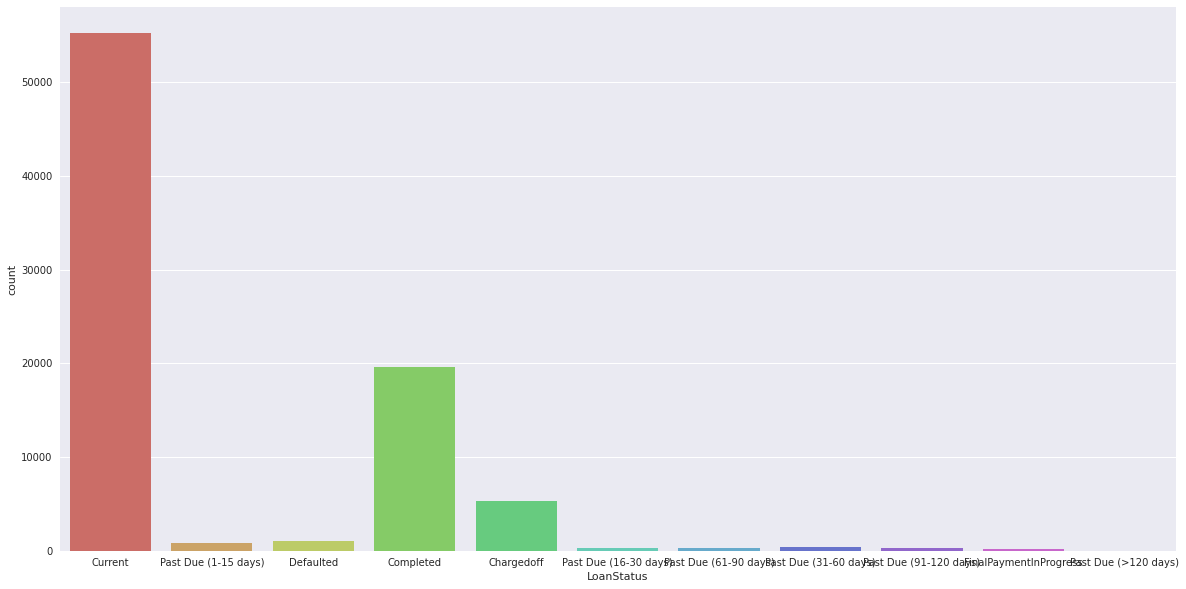

In [21]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["LoanStatus"], palette="hls");

***It appears that most loans are still current at the end of this data collection & Some more than the rest are gone***

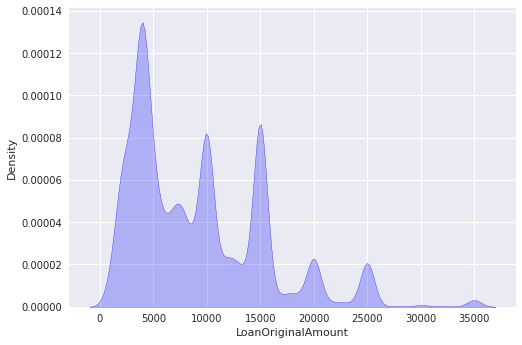

In [22]:
fig = sns.kdeplot(df['LoanOriginalAmount'], shade=True, color="b")


***The largest amount of loans in the borrowed amount goes to the average of 5,000, 10,000, and 15,000 $***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


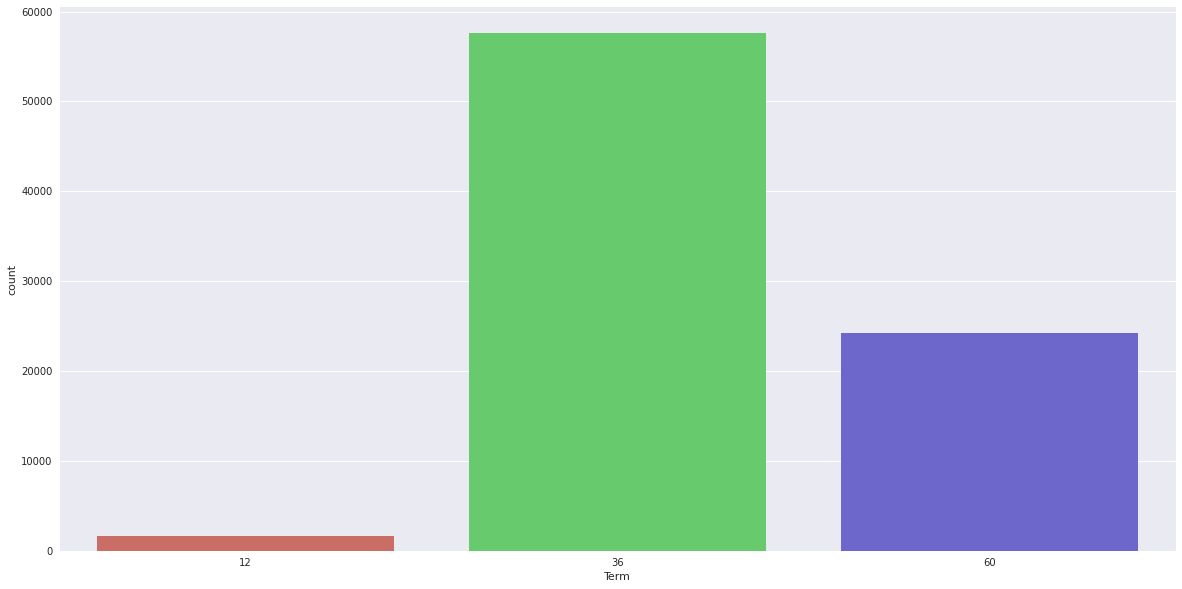

In [23]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["Term"], palette="hls");

***Most loans fall within the three-year range, followed by the five-year range***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


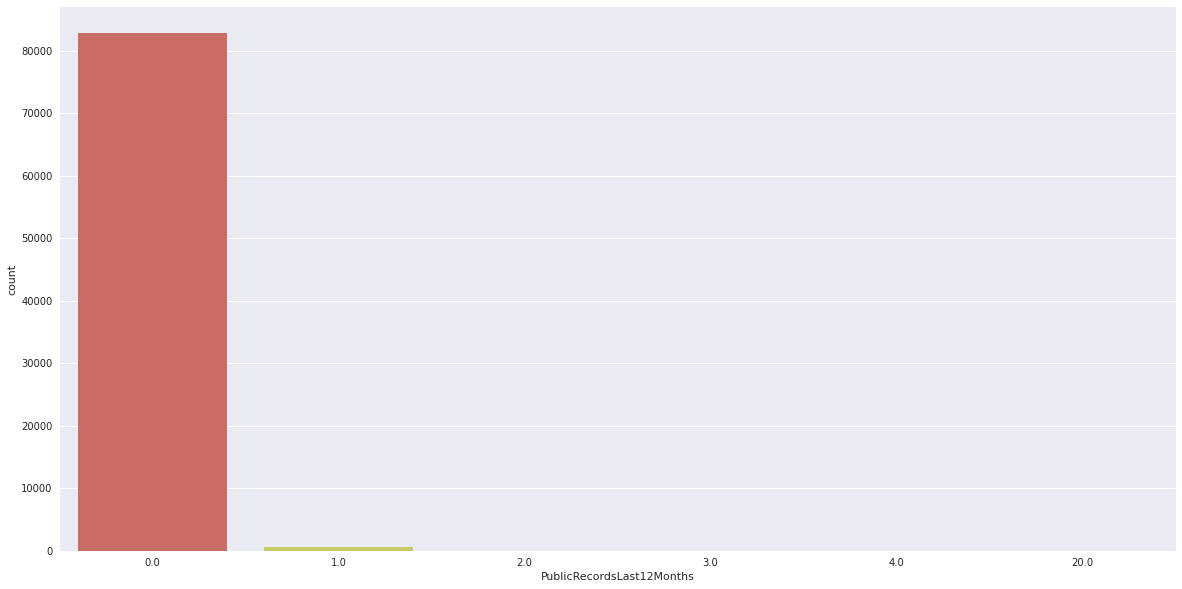

In [24]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["PublicRecordsLast12Months"], palette="hls");


***This is amazing and good.. More than 95% of customers do not delay loans or accumulate them !***

## Q2 :  Financial condition (property, salary, etc.)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


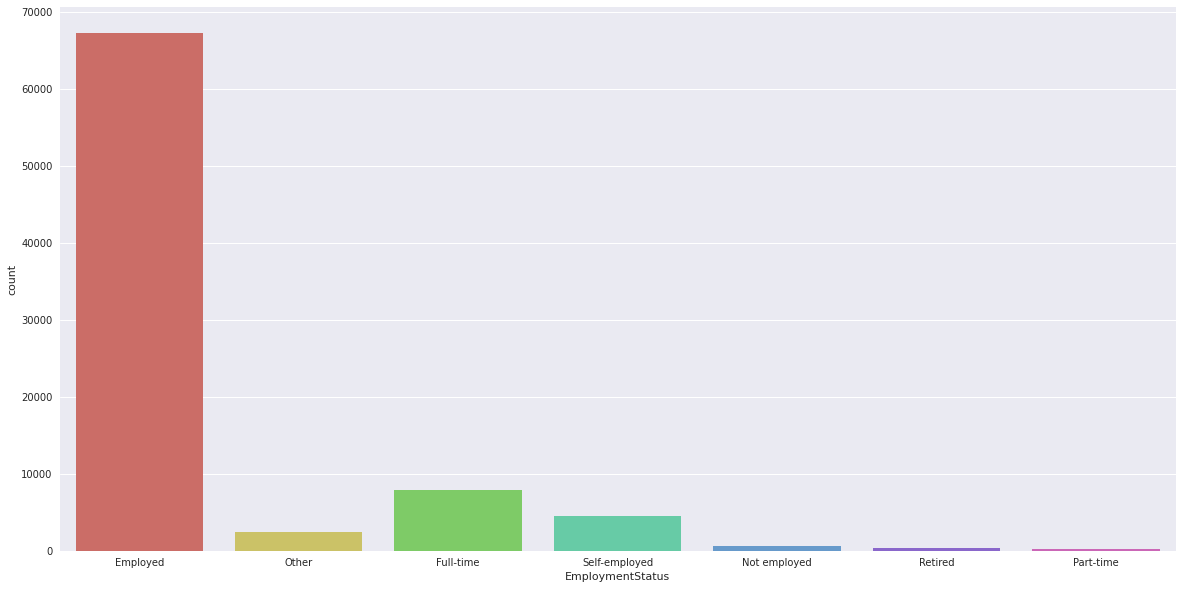

In [25]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["EmploymentStatus"], palette="hls");

***Great people here they have a recognized business..***

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


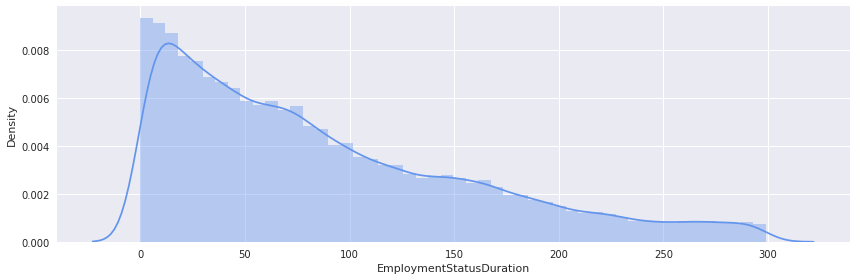

In [26]:
income_df = df.loc[(df['EmploymentStatusDuration'] < 300)  ,['EmploymentStatusDuration']]
x1 = sns.FacetGrid(income_df, height=4, aspect=3)
x1 = x1.map(sns.distplot, 'EmploymentStatusDuration', color='cornflowerblue')
plt.show()

***Then most of our clients now have a business cycle of five years !***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


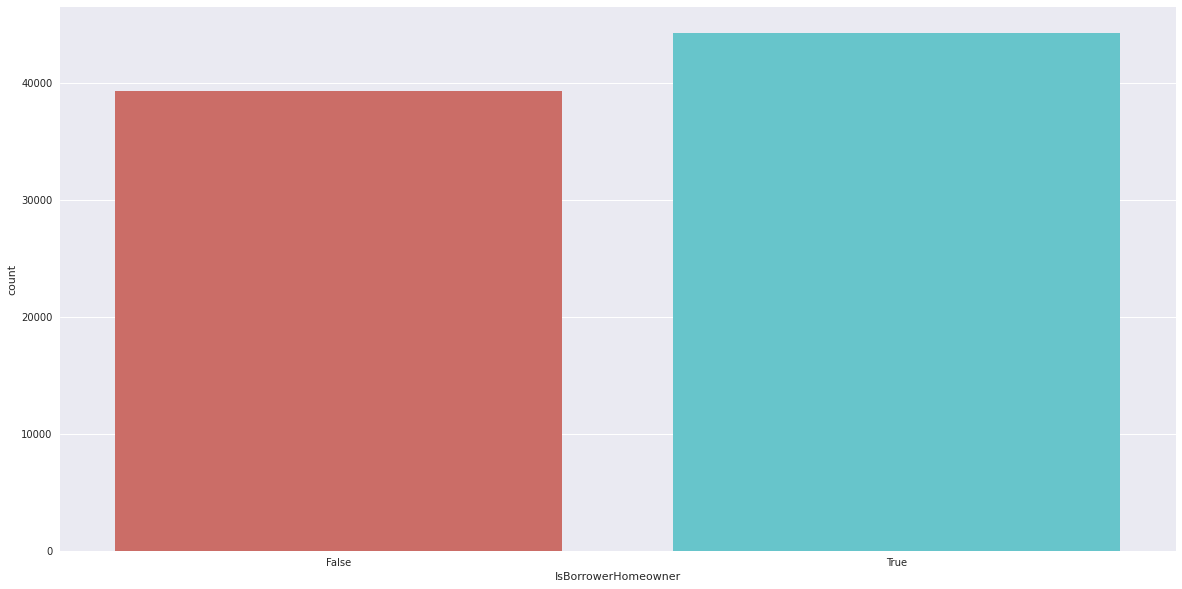

In [27]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["IsBorrowerHomeowner"], palette="hls");

***A little good.. about half of the customers do not have home ownership***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


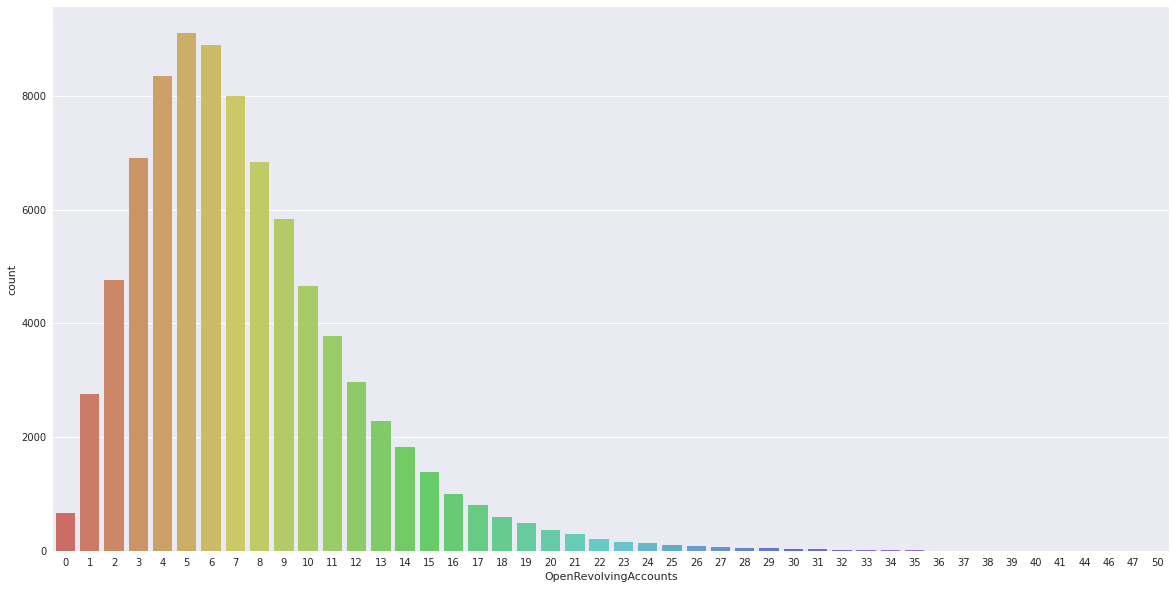

In [28]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["OpenRevolvingAccounts"], palette="hls");

***The number of our clients' accounts is not exaggerated! Average of about six accounts***

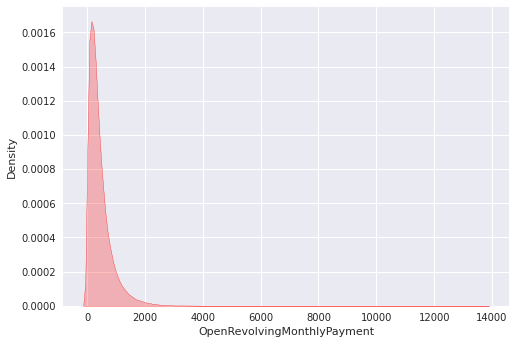

In [29]:
fig = sns.kdeplot(df['OpenRevolvingMonthlyPayment'], shade=True, color="r")


***important note ! These accounts are not what we thought! The average monthly account disbursement is  1,000 $ first or lowest***

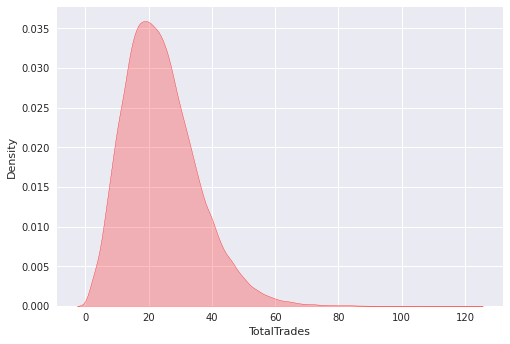

In [30]:
fig = sns.kdeplot(df['TotalTrades'], shade=True, color="r")


***Our clients are doing quite well.. the average number of commercial lines that have been opened is around 30 lines***

## Q3 : How do people pay and the average loan repayment period ? 

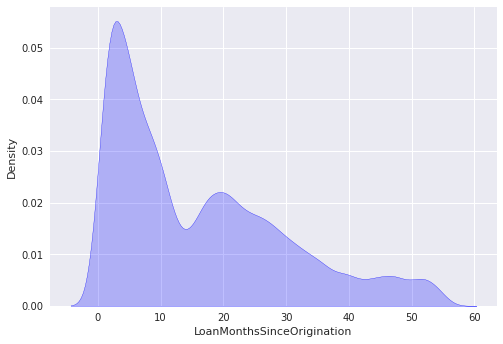

In [31]:
fig = sns.kdeplot(df['LoanMonthsSinceOrigination'], shade=True, color="b")


***Hist ot Number of months since the loan originated.***

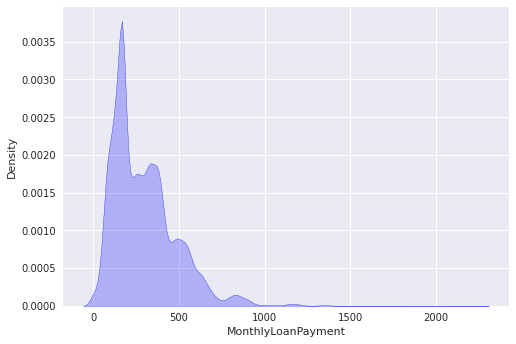

In [32]:
fig = sns.kdeplot(df['MonthlyLoanPayment'], shade=True, color="b")


***Monthly loan payment percentage***

## Q4 : Why was this loan taken?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


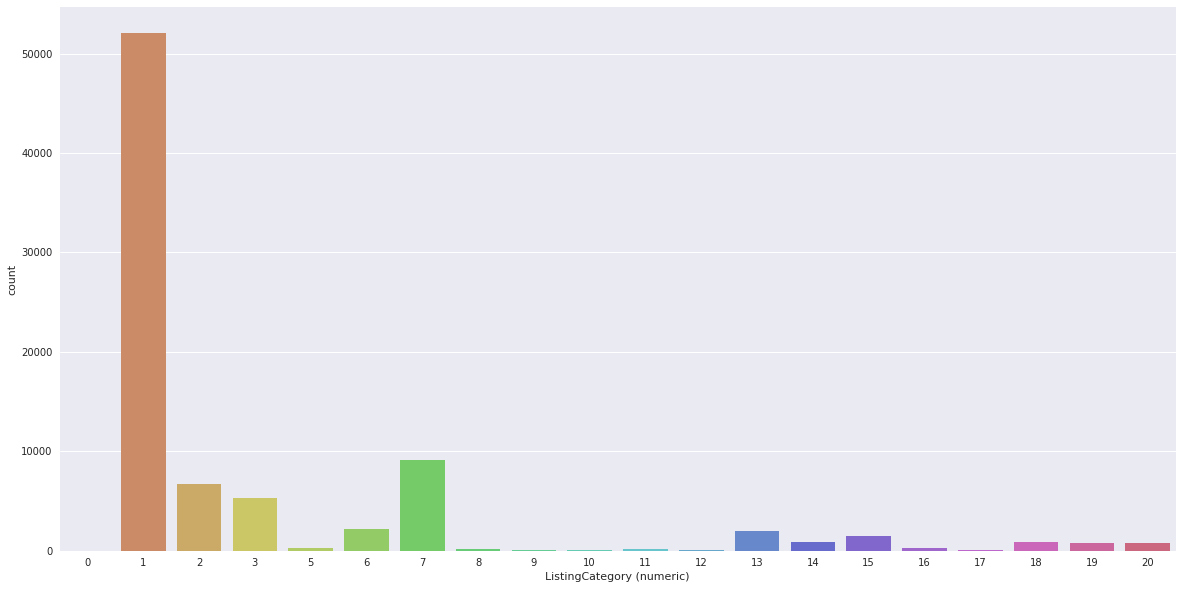

In [33]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["ListingCategory (numeric)"], palette="hls");

The category of the listing that the borrower selected when posting their listing:  
1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 
6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic 
Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses,
14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes,
19 - Vacation, 20 - Wedding Loans

***Here it seems that most of the reasons for loans are : 1- Debt Consolidation,, 2- Others, 3- Home,, 4- Business***

# Advanced EDA

***The most critical tool in a P2P lending organization is its ability to assess a borrower’s creditworthiness as accurate as possible. Here, I am going to asses the tools used and to see if it is accurate in determining a person’s creditworthiness mainly Credit Grade and Prosper Score***

### Research Question 1 : What are the most number of borrowers Credit Grade?

In [34]:
n_df = pd.read_csv("../input/prosper-loan/prosperLoanData.csv")


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


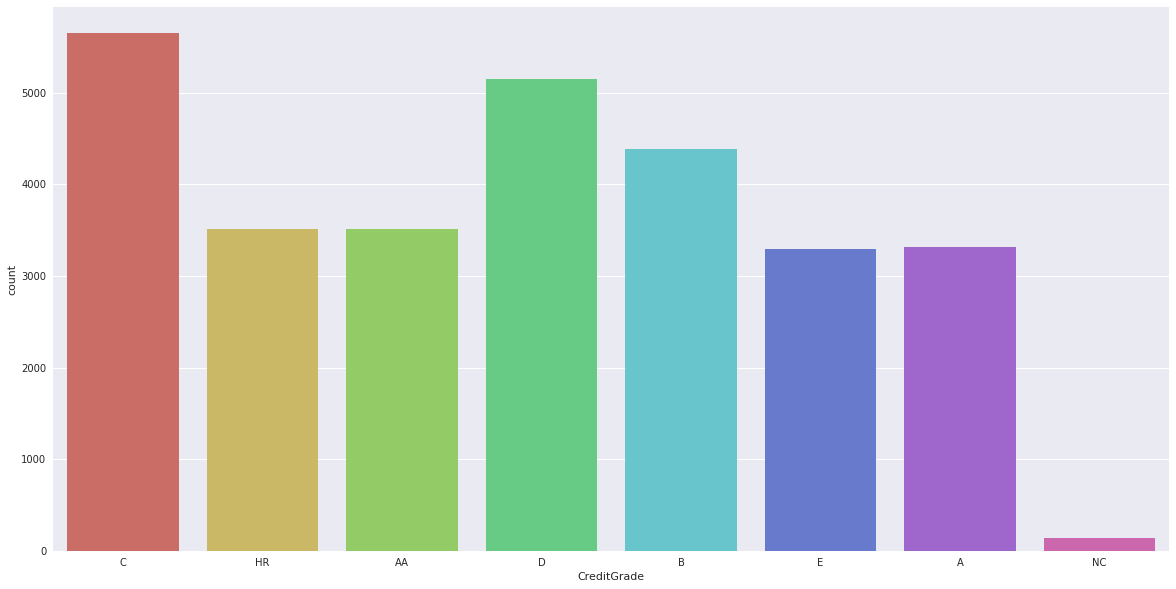

In [35]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(n_df["CreditGrade"], palette="hls");

***All results are before 2009 but credit rating seems to be low***

### Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


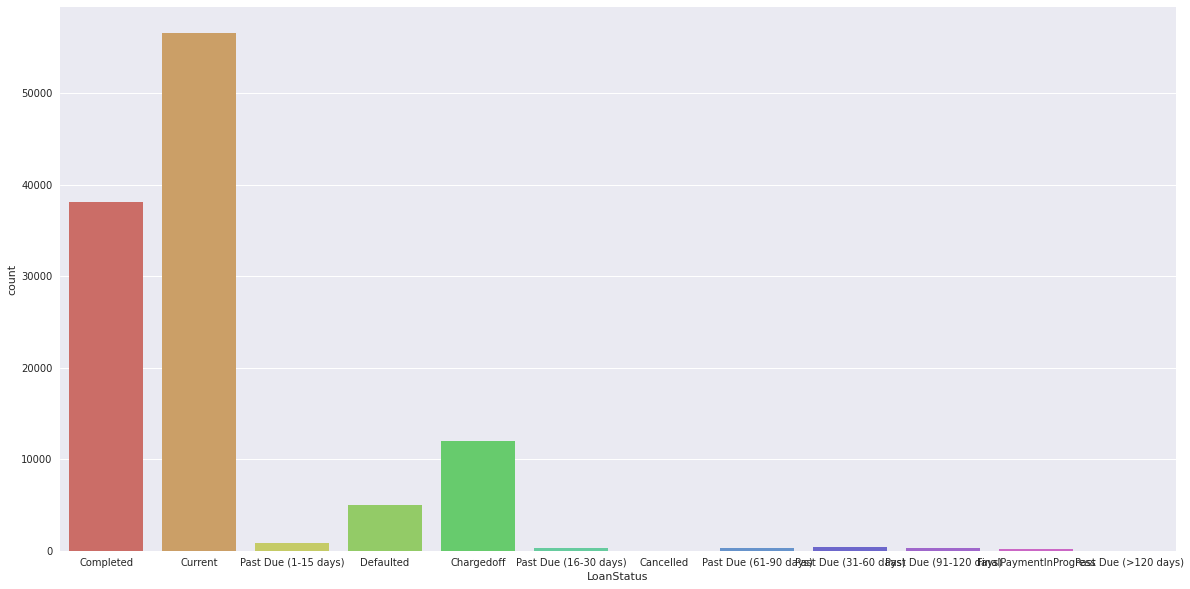

In [36]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(n_df["LoanStatus"], palette="hls");

***Despite the drop, they are not late in paying.. It seems that they are moral ^^***

### Research Question 3 : What is the highest number of BorrowerRate?

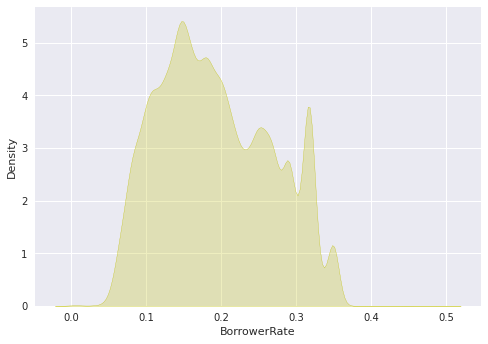

In [37]:
fig = sns.kdeplot(n_df['BorrowerRate'], shade=True, color="y")

In [38]:
print("Max rate : " +str(n_df['BorrowerRate'].max()))

Max rate : 0.4975


### Research Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

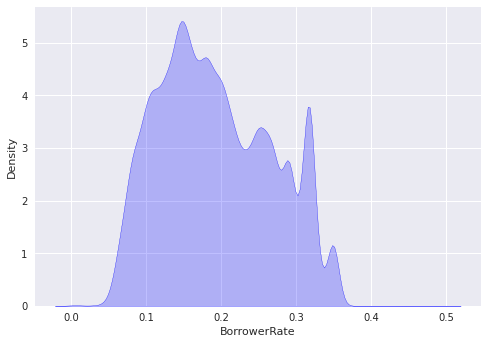

In [39]:
fig = sns.kdeplot(n_df['BorrowerRate'], shade=True, color="b")


***Indeed it is***

### Research Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

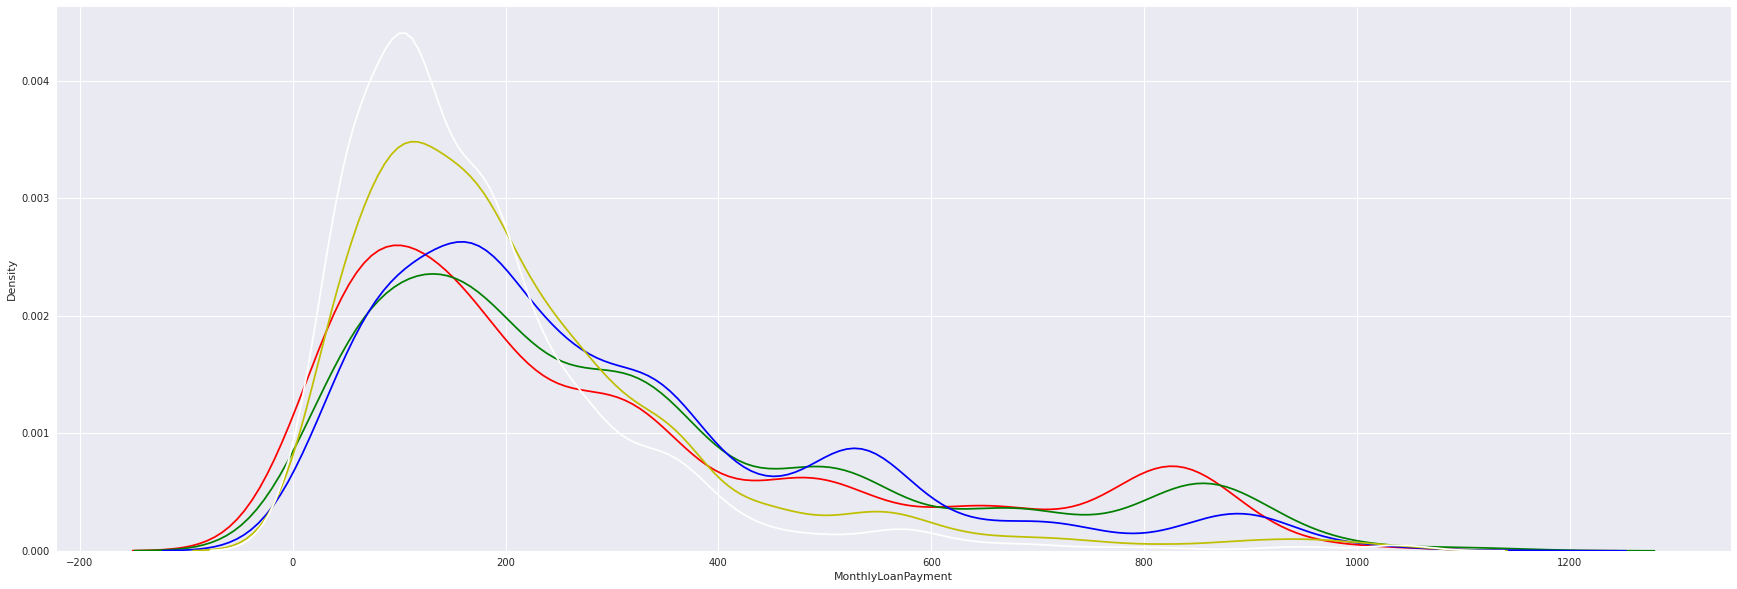

In [40]:
plt.figure(figsize = (30,10))
sns.kdeplot(n_df[n_df['CreditGrade'] == 'AA']['MonthlyLoanPayment'], color='r')
sns.kdeplot(n_df[(n_df['CreditGrade'] == 'A')]['MonthlyLoanPayment'], color='g')
sns.kdeplot(n_df[(n_df['CreditGrade'] == 'B')]['MonthlyLoanPayment'], color='b')
sns.kdeplot(n_df[ (n_df['CreditGrade'] == 'C')]['MonthlyLoanPayment'], color='y')
sns.kdeplot(n_df[(n_df['CreditGrade'] == 'D')]['MonthlyLoanPayment'], color='w')
plt.show()

***Well we don't see that many.. credit score layers are all at roughly the same monthly payment rate***

### Research Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

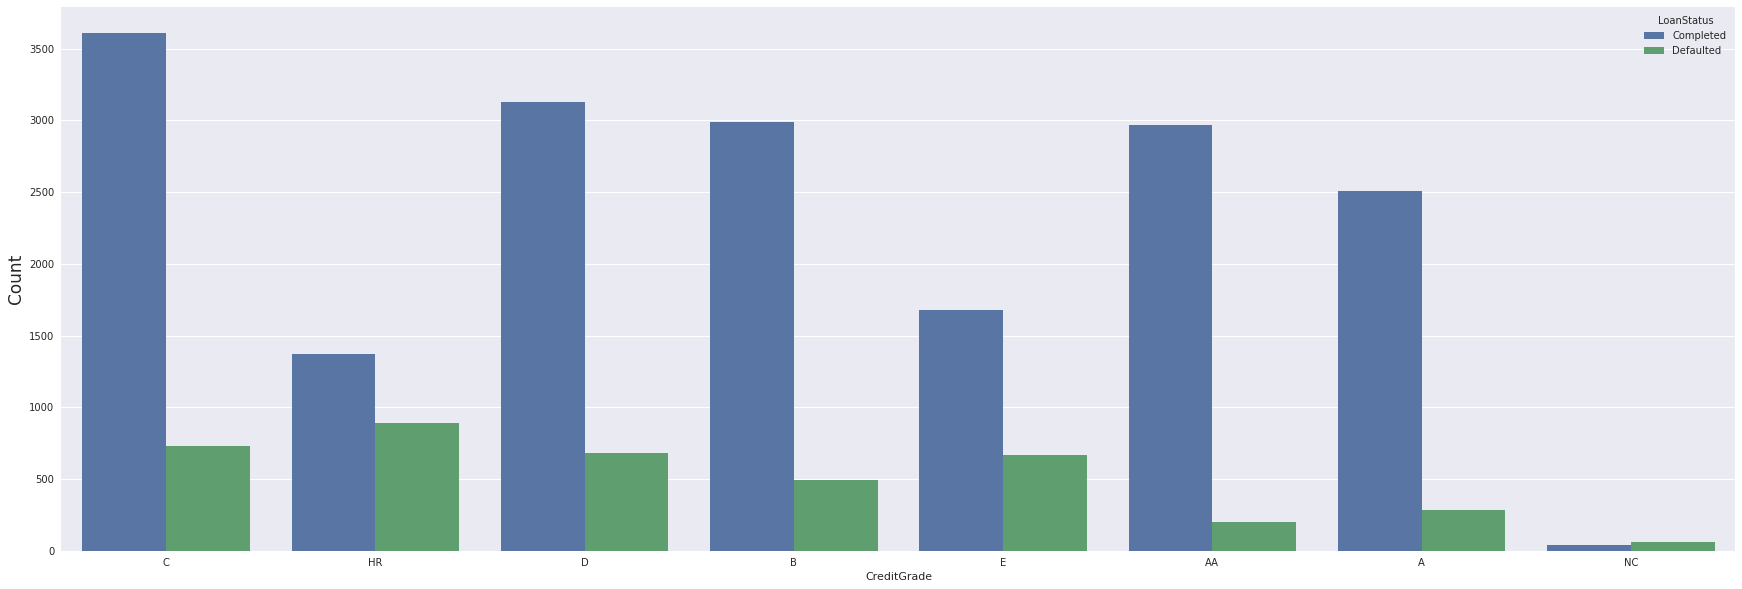

In [41]:
to_show = pd.DataFrame(columns = ["LoanStatus","CreditGrade"])
to_show["LoanStatus"] = n_df[(n_df['LoanStatus'] == 'Defaulted') | (n_df['LoanStatus'] == 'Completed') ]['LoanStatus']
to_show["CreditGrade"]=n_df[(n_df['LoanStatus'] == 'Defaulted') | (n_df['LoanStatus'] == 'Completed') ]['CreditGrade']
plt.figure(figsize = (30,10))
ax2 = sns.countplot(hue="LoanStatus", x='CreditGrade', data=to_show )
ax2.set_ylabel("Count", fontsize=17)
plt.show()


***This is another proof that the delay is not very dependent on the credit score.. they are all almost equal***

### Research Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

note : From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.



Text(0.5, 0, 'BorrowerRate VS BorrowerAPR')

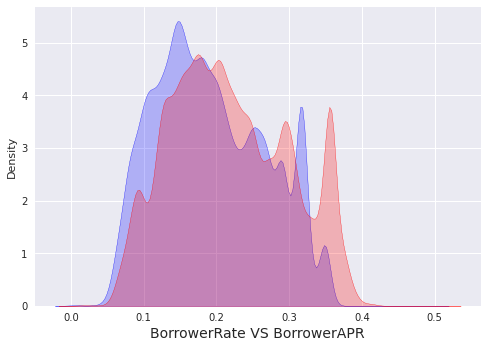

In [42]:
fig = sns.kdeplot(n_df['BorrowerRate'], shade=True, color="b")
fig = sns.kdeplot(n_df['BorrowerAPR'], shade=True, color="r")
fig.set_xlabel("BorrowerRate VS BorrowerAPR", fontsize=14)

***It seems really like that.. they are very dependent on each other and clearly***

****

***Lets see the correlation matrex now , maybe help us ..***

## Corr matrex :

In [43]:
df.corr()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
Term,1.000000,-0.069277,-0.001311,-0.001278,0.056594,-0.109191,0.152326,0.081321,0.027638,-0.064395,...,-0.205726,0.018295,0.040640,0.042468,-0.013548,-0.016769,-0.030887,-0.032787,-0.016049,0.011206
BorrowerAPR,-0.069277,1.000000,0.993313,0.993314,0.894628,0.949169,0.794191,-0.962227,-0.669519,0.109330,...,0.128017,-0.074398,0.127550,0.126044,0.059861,-0.023849,-0.011728,-0.019504,-0.001206,-0.267532
BorrowerRate,-0.001311,0.993313,1.000000,0.999996,0.894256,0.944882,0.817627,-0.953157,-0.651193,0.103991,...,0.101424,-0.076585,0.136355,0.134839,0.062804,-0.029625,-0.009460,-0.015680,0.001127,-0.245017
LenderYield,-0.001278,0.993314,0.999996,1.000000,0.894317,0.944894,0.817611,-0.953171,-0.651240,0.103998,...,0.101431,-0.076572,0.136356,0.134841,0.062805,-0.029631,-0.009454,-0.015675,0.001129,-0.245062
EstimatedEffectiveYield,0.056594,0.894628,0.894256,0.894317,1.000000,0.796141,0.801671,-0.847204,-0.632780,0.109034,...,0.060348,-0.068800,0.139696,0.138987,0.049125,-0.043381,-0.047175,-0.064309,-0.038411,-0.267624
EstimatedLoss,-0.109191,0.949169,0.944882,0.944894,0.796141,1.000000,0.589958,-0.964112,-0.674370,0.099846,...,0.199876,-0.061356,0.093636,0.092346,0.051251,-0.022786,0.004003,0.009469,0.024662,-0.277567
EstimatedReturn,0.152326,0.794191,0.817627,0.817611,0.801671,0.589958,1.000000,-0.659969,-0.385769,0.091283,...,-0.131838,-0.094168,0.195506,0.193609,0.074835,-0.038878,-0.020758,-0.043888,-0.032329,-0.095814
ProsperRating (numeric),0.081321,-0.962227,-0.953157,-0.953171,-0.847204,-0.964112,-0.659969,1.000000,0.705908,-0.095452,...,-0.213545,0.058483,-0.086596,-0.085413,-0.047087,0.012554,0.004874,0.007819,-0.010519,0.309904
ProsperScore,0.027638,-0.669519,-0.651193,-0.651240,-0.632780,-0.674370,-0.385769,0.705908,1.000000,-0.011027,...,-0.229377,0.020936,-0.026413,-0.026351,-0.018380,-0.018929,0.026146,0.028039,0.002908,0.319994
ListingCategory (numeric),-0.064395,0.109330,0.103991,0.103998,0.109034,0.099846,0.091283,-0.095452,-0.011027,1.000000,...,0.048569,-0.004342,0.016914,0.017066,-0.002212,-0.000757,-0.000637,-0.005063,-0.003443,-0.047060


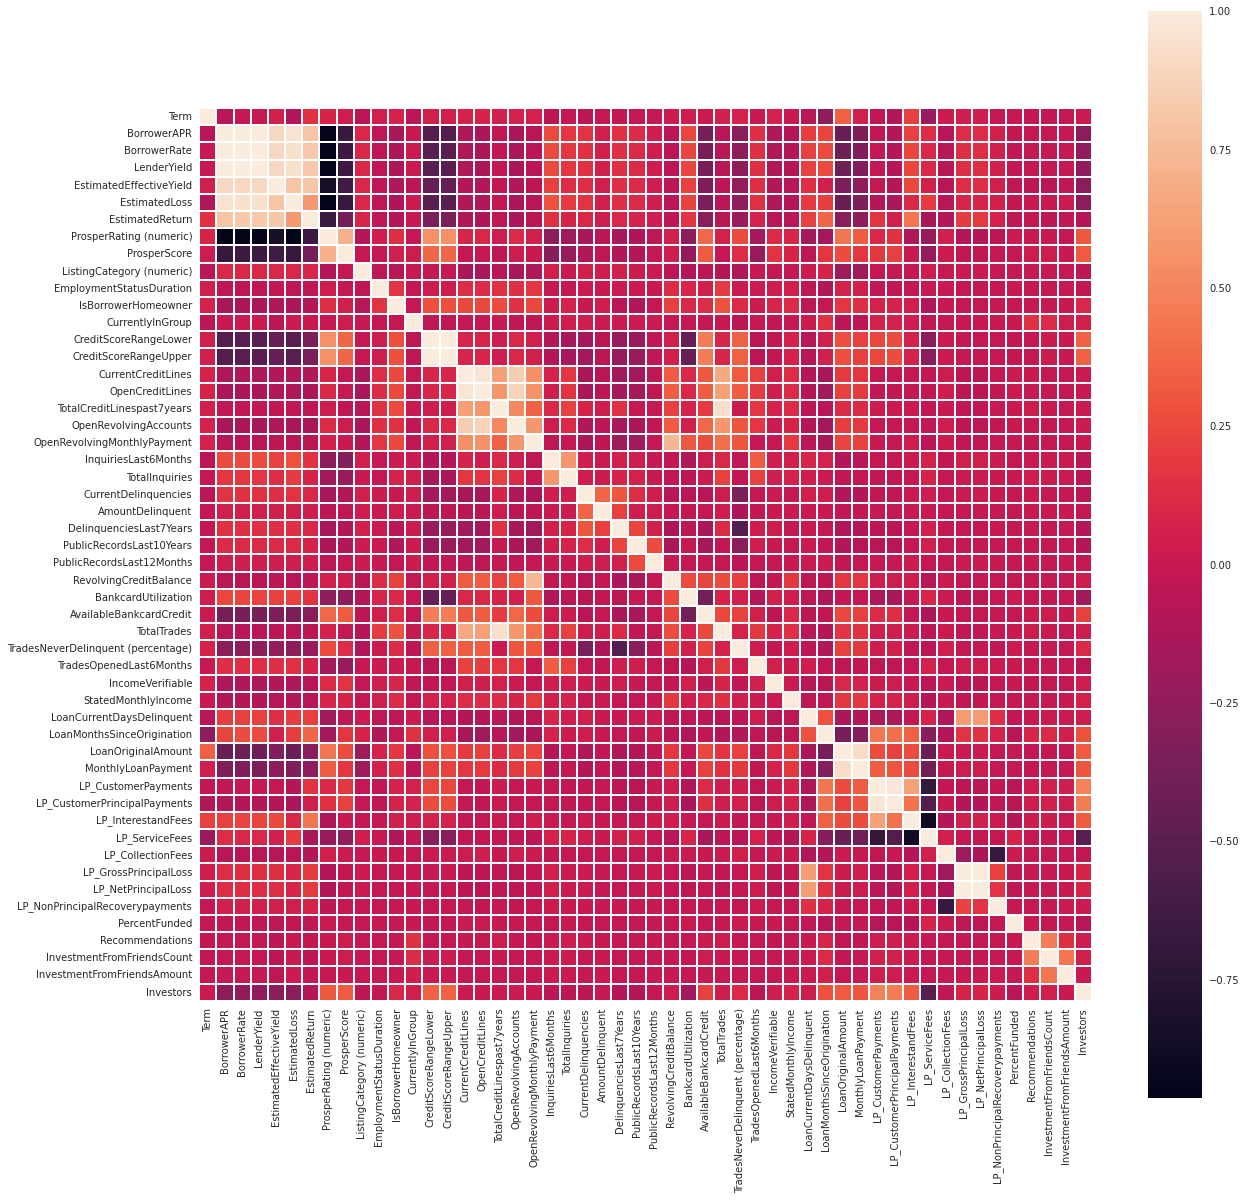

In [44]:
f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(df.corr(),linewidths=.3,square=True)

***It shows us here that most of the variables, but most of them depend on each other***

****

## Business Insight : 
Since the most important assest of a P2P lending Organization is its ability in using its tool to determine a borrower’s creditworthiness as accurate as possible. The organization would be more confident to market its organization as a great investment for investor to invest in hence leading to more borrower and higher market capitilization and boost revenue growth.



## Maybe we're done now.. Thank you ^^ 